In [ ]:
import pandas as pd
import numpy as np
import re  # Import the 're' library for regular expression operations
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_predict

In [ ]:
# Load the data from the CSV file
data = pd.read_csv('house_prices.csv')

In [ ]:
data.isna().sum()

Title                1
Sub_title            0
Price                0
Address           4136
Baths                0
Land size            0
Beds                 0
House size           0
Location             0
Description          0
Post_URL             0
Seller_name          1
Seller_type          0
published_date       0
Geo_Address          0
Lat                  0
Lon                  0
dtype: int64

In [ ]:
# Handling missing values (if any)
data.fillna(0, inplace=True)  # Replace missing values with 0, but you can use other strategies depending on the data.

In [ ]:
data.head()

,Title,Sub_title,Price,Address,Baths,Land size,Beds,House size,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Geo_Address,Lat,Lon
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara","Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara","Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,Ishara Dilshan,Member,2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo","Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,DILRUWAN REAL ESTATE,Premium-Member,2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246
2,Kelaniya - House on 20P Land for sale for sale,"Posted on 17 Nov 5:19 pm, Kelaniya, Gampaha","Rs 20,000,000",Kelaniya- Ranaviru Maldeniya Road,2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha","Kelaniya- Biyagama road, Ranaviru Maladeniya R...",https://ikman.lk/en/ad/kelaniya-house-on-20p-l...,Provident Paradise (Pvt) Ltd,Member,2021-11-17 17:19:00,"Kelaniya, Gampaha, Sri Lanka",79.914926,6.951178
3,House For Sale in Pamankada Lane Wellawatte Co...,"Posted on 17 Nov 5:07 pm, Colombo 6, Colombo","Rs 187,000,000",Pamankada Lane Wellawatte Colombo.06,5,22.0 perches,5,"4,000.0 sqft","Colombo 6, Colombo",22 Perches House For Sale in Pamankada Lane We...,https://ikman.lk/en/ad/house-for-sale-in-paman...,Colombo Construction Property Developers,Premium-Member,2021-11-17 17:07:00,"Colombo 6, Colombo, Sri Lanka",80.016670,6.866670
4,House For Sale - Attidiya for sale,"Posted on 17 Nov 5:06 pm, Dehiwala, Colombo","Rs 1,300,000",MainRoad Attidiya,1,6.3 perches,2,900.0 sqft,"Dehiwala, Colombo",*à¶ à¶­à·à¶­à·à¶©à·à¶º à¶´à·âà¶»à¶¯à·à·...,https://ikman.lk/en/ad/house-for-sale-attidiya...,Lakdinu Houses,Member,2021-11-17 17:06:00,"Dehiwala, Colombo, Sri Lanka",79.880242,6.838232


In [ ]:
# Converting categorical variables using one-hot encoding (if any)
# You can identify categorical columns and convert them to numerical representations.
# For example, if you have a 'Location' column containing location names, you can use one-hot encoding.
categorical_columns = ['Location', 'Seller_type']  # Add other categorical columns as needed
data = pd.get_dummies(data, columns=categorical_columns)


In [ ]:
# Cleaning 'Land size' column
data['Land size'] = data['Land size'].astype(str).apply(lambda x: re.sub('[^0-9.]', '', x))
data['Land size'] = pd.to_numeric(data['Land size'], errors='coerce')

data['Beds'] = data['Beds'].replace('10+', 10)
data['Baths'] = data['Baths'].replace('10+', 10)


In [ ]:
# Cleaning 'House size' column
data['House size'] = data['House size'].str.replace(' sqft', '').str.replace(',', '').astype(float)

In [ ]:
data.head()

,Title,Sub_title,Price,Address,Baths,Land size,Beds,House size,Description,Post_URL,...,"Location_ Wattala, Gampaha","Location_ Wattegama, Kandy","Location_ Weligama, Matara","Location_ Welimada, Badulla","Location_ Wellampitiya, Colombo","Location_ Wellawaya, Monaragala","Location_ Wennappuwa, Puttalam","Location_ Yatiyantota, Kegalle",Seller_type_Member,Seller_type_Premium-Member
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara","Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0,3,1600.0,"Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,...,0,0,0,0,0,0,0,0,1,0
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo","Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0,3,1480.0,*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,...,0,0,0,0,0,0,0,0,0,1
2,Kelaniya - House on 20P Land for sale for sale,"Posted on 17 Nov 5:19 pm, Kelaniya, Gampaha","Rs 20,000,000",Kelaniya- Ranaviru Maldeniya Road,2,20.0,3,2800.0,"Kelaniya- Biyagama road, Ranaviru Maladeniya R...",https://ikman.lk/en/ad/kelaniya-house-on-20p-l...,...,0,0,0,0,0,0,0,0,1,0
3,House For Sale in Pamankada Lane Wellawatte Co...,"Posted on 17 Nov 5:07 pm, Colombo 6, Colombo","Rs 187,000,000",Pamankada Lane Wellawatte Colombo.06,5,22.0,5,4000.0,22 Perches House For Sale in Pamankada Lane We...,https://ikman.lk/en/ad/house-for-sale-in-paman...,...,0,0,0,0,0,0,0,0,0,1
4,House For Sale - Attidiya for sale,"Posted on 17 Nov 5:06 pm, Dehiwala, Colombo","Rs 1,300,000",MainRoad Attidiya,1,6.3,2,900.0,*à¶ à¶­à·à¶­à·à¶©à·à¶º à¶´à·âà¶»à¶¯à·à·...,https://ikman.lk/en/ad/house-for-sale-attidiya...,...,0,0,0,0,0,0,0,0,1,0


In [ ]:

# Scaling/normalizing numerical features using StandardScaler
numerical_columns = ['Baths', 'Land size', 'Beds', 'House size', 'Lat', 'Lon']  # Add other numerical columns as needed
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
# Convert the 'Price' column to a numeric type (float)
data['Price'] = data['Price'].replace('[^\d.]', '', regex=True).astype(float)

In [ ]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

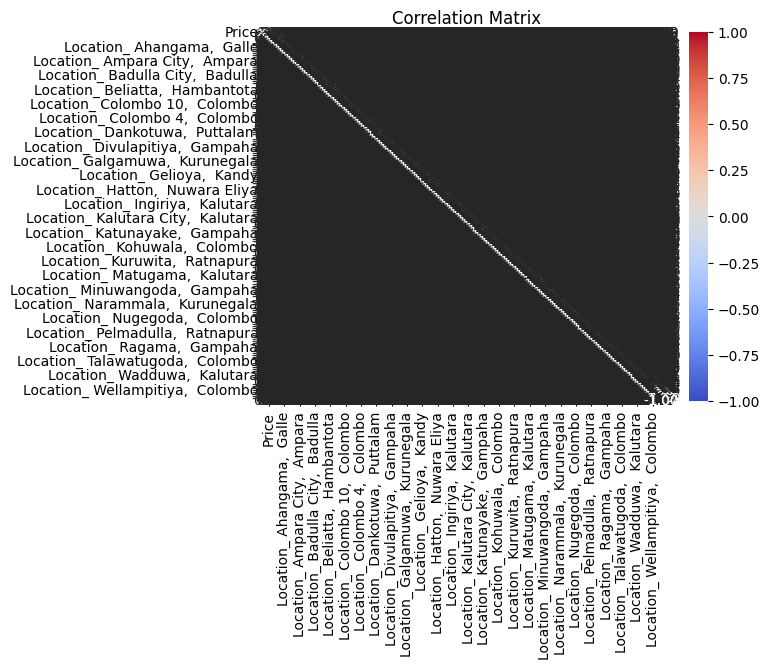

In [ ]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

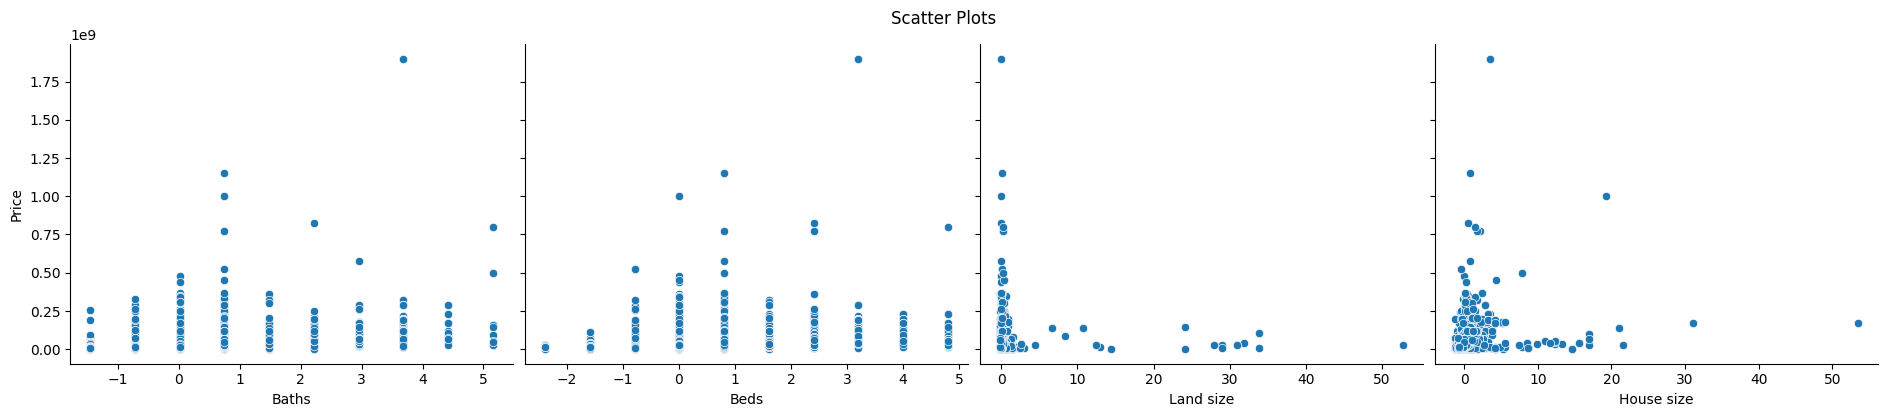

In [ ]:
# Visualizations - Scatter plots
sns.pairplot(numeric_data, x_vars=['Baths', 'Beds', 'Land size', 'House size'], y_vars='Price', height=4, aspect=1.2, kind='scatter')
plt.suptitle('Scatter Plots', y=1.02)
plt.show()

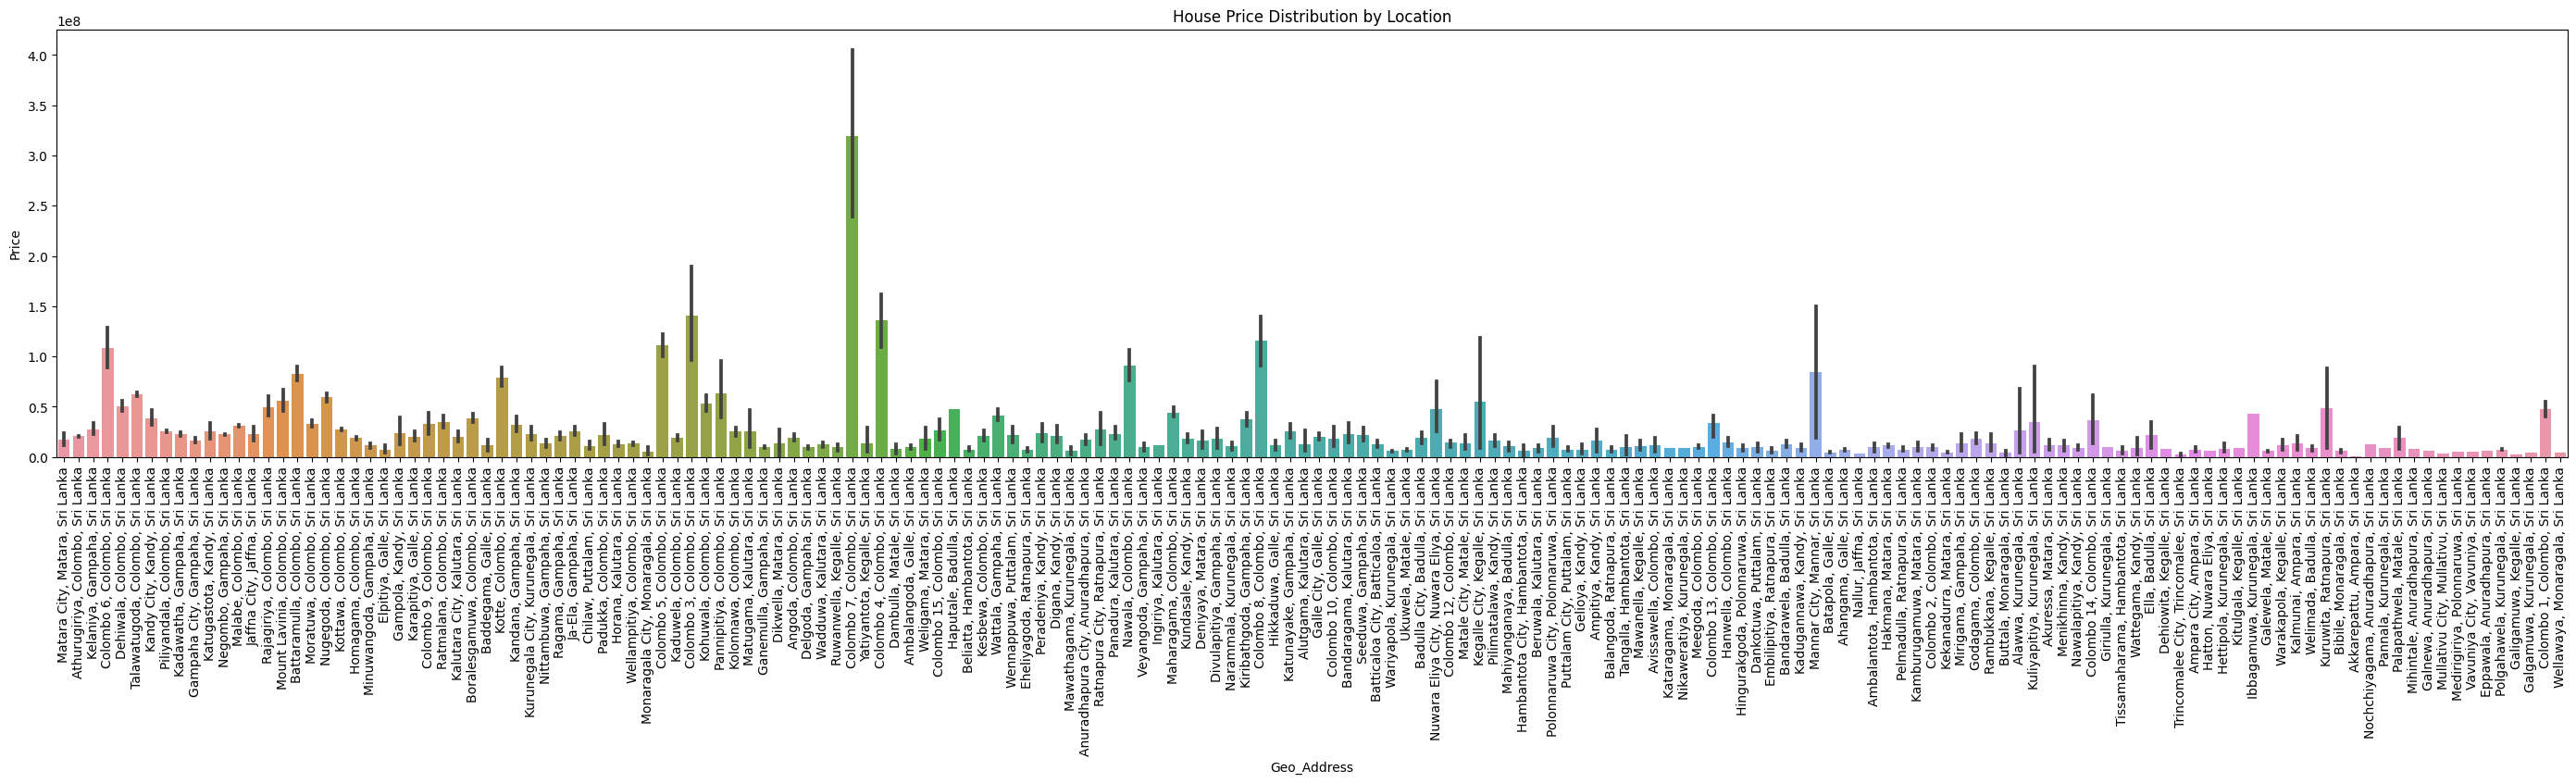

In [ ]:
plt.figure(figsize=(35, 6))
sns.barplot(x='Geo_Address', y='Price', data=data)
plt.xticks(rotation=90)
plt.title('House Price Distribution by Location')
plt.show()

In [ ]:
# Convert numeric columns to their respective data types (if needed)
data['Lat'] = pd.to_numeric(data['Lat'], errors='coerce')
data['Lon'] = pd.to_numeric(data['Lon'], errors='coerce')

In [ ]:
# Handling missing values for numeric columns by filling with the mean of the respective columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [ ]:
# Split the dataset into features (X) and target (y)
X = data.drop(['Price'], axis=1)  # Independent variables (features)
y = data['Price']  # Dependent variable (target)

In [ ]:
# Convert all non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

In [ ]:
# Selecting top k features with the highest correlation using SelectKBest
k =5  # You can choose the desired number of features based on your preference or domain knowledge
selector = SelectKBest(score_func=f_regression, k=k)
y = y.astype('float32')
X_new = selector.fit_transform(X, y)

In [ ]:
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

In [ ]:
# Get the selected feature names
selected_features = X.columns[selected_feature_indices]

In [ ]:
# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Baths', 'House size',
       'Title_Brand New Beautiful 3 stored house / office with elevator pannipitiya for sale',
       'Address_pannipitiya depanama',
       'Post_URL_https://ikman.lk/en/ad/brand-new-beautiful-3-stored-house-office-with-elevator-pannipitiya-for-sale-colombo-2'],
      dtype='object')


In [ ]:
# Split the dataset into features (X) and target (y)
X = data.drop(['Price'], axis=1)  # Independent variables (features)
y = data['Price']  # Dependent variable (target)

In [ ]:
# Convert all non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

In [ ]:
# Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
# Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

In [ ]:
# Predicting house prices on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

In [ ]:
# Evaluating the models
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
gb_r2 = r2_score(y_test, y_pred_gb)

In [ ]:
# Displaying the evaluation results
print("Linear Regression:")
print("RMSE:", lr_rmse)
print("R-squared:", lr_r2)

print("\nRandom Forest Regression:")
print("RMSE:", rf_rmse)
print("R-squared:", rf_r2)

print("\nGradient Boosting Regression:")
print("RMSE:", gb_rmse)
print("R-squared:", gb_r2)

In [ ]:
#####Seee frm first version 1 hevy
# Split the dataset into features (X) and target (y)
X = data.drop(['Price'], axis=1)  # Independent variables (features)
y = data['Price']  # Dependent variable (target)

# Convert all non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Create the Linear Regression model
lr_model = LinearRegression()

# Perform cross-validation and get predicted house prices using cross_val_predict
y_pred_cv = cross_val_predict(lr_model, X, y, cv=5)  # 5-fold cross-validation

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred_cv)
mae = mean_absolute_error(y, y_pred_cv)
r2 = r2_score(y, y_pred_cv)

# Display the evaluation results
print("Cross-Validation Results:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

In [ ]:
#5 version 2 hevy

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def house_price_prediction(data):


  # Split the dataset into features (X) and target (y)
  X = data.drop('Price', axis=1)
  y = data['Price']

  # Convert all non-numeric columns to numeric using one-hot encoding
  X = pd.get_dummies(X)

  # Create the Linear Regression model
  lr_model = LinearRegression()

  # Perform cross-validation and get predicted house prices using cross_val_predict
  y_pred_cv = cross_val_predict(lr_model, X, y, cv=5)

  # Calculate evaluation metrics
  mse = mean_squared_error(y, y_pred_cv)
  mae = mean_absolute_error(y, y_pred_cv)
  r2 = r2_score(y, y_pred_cv)

  # Return the cross-validation results
  return {
      'mse': mse,
      'mae': mae,
      'r2': r2,
  }

if __name__ == '__main__':

  # Get the cross-validation results
  results = house_price_prediction(data)

  # Print the cross-validation results
  print('Cross-Validation Results:')
  for metric, value in results.items():
    print(f'{metric}: {value}')


In [ ]:
#5 version 3 20000 random data

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def house_price_prediction(data):
  """Predicts house prices using cross-validation.

  Args:
    data: A Pandas DataFrame containing the house price data.

  Returns:
    A dictionary containing the cross-validation results.
  """

  # Only use the first 1000 rows of the dataset
  data = data.iloc[:5000]
  #data = data.sample(13000, random_state=1)

  # Split the dataset into features (X) and target (y)
  X = data.drop('Price', axis=1)
  y = data['Price']

  # Convert all non-numeric columns to numeric using one-hot encoding
  X = pd.get_dummies(X)

  # Create the Linear Regression model
  lr_model = LinearRegression()

  # Perform cross-validation and get predicted house prices using cross_val_predict
  y_pred_cv = cross_val_predict(lr_model, X, y, cv=5)

  # Calculate evaluation metrics
  mse = mean_squared_error(y, y_pred_cv)
  mae = mean_absolute_error(y, y_pred_cv)
  r2 = r2_score(y, y_pred_cv)

  # Return the cross-validation results
  return {
      'mse': mse,
      'mae': mae,
      'r2': r2,
  }

if __name__ == '__main__':
  # Get the cross-validation results
  results = house_price_prediction(data)

  # Print the cross-validation results
  print('Cross-Validation Results:')
  for metric, value in results.items():
    print(f'{metric}: {value}')



In [ ]:
#6
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

CR = 500000000
class HousePricePredictor:
    def __init__(self):
        self.lr_model = LinearRegression()

    def load_data(self, csv_file , sample_frac=0.1, random_state=42):
        data = pd.read_csv(csv_file).sample(frac=sample_frac, random_state=random_state)
        ##data = data
        data['Lat'] = pd.to_numeric(data['Lat'], downcast='')
        data['Lon'] = pd.to_numeric(data['Lon'], downcast='float')
        data = pd.get_dummies(data)
        self.X = data.drop(['Price'], axis=1)
        self.y = data['Price']

    def train_model(self):
        self.lr_model.fit(self.X, self.y)

    def predict_house_price_with_dive(self, location, baths, beds, land_size, house_size, price_dive=1000):
        user_data = pd.DataFrame({
            'Location': [location],
            'Baths': [baths],
            'Beds': [beds],
            'Land size': [land_size],
            'House size': [house_size]
        })
        user_data = pd.get_dummies(user_data)
        user_data = user_data.reindex(columns=self.X.columns, fill_value=0)
        predicted_price = self.lr_model.predict(user_data)
        predicted_price -= price_dive
        return predicted_price[0]

def main():
    print("House Price Prediction Application")
    print("Please enter the following details:")

    predictor = HousePricePredictor()
    predictor.load_data('cleaned2_house_prices.csv')

    location = input("Location: ")
    baths = float(input("Number of Bathrooms: "))
    beds = int(input("Number of Bedrooms: "))
    land_size = float(input("Land Size (perches): "))
    house_size = float(input("House Size (sqft): "))

    predictor.train_model()
    predicted_price = predictor.predict_house_price_with_dive(location, baths, beds, land_size, house_size)

    print(f"Predicted House Price : Rs {predicted_price/CR:.2f} Million" )

if __name__ == "__main__":
    main()





In [ ]:
!pip install PySimpleGUI

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import PySimpleGUI as sg

CR = 500000000
class HousePricePredictor:
    def __init__(self):
        self.lr_model = LinearRegression()

    def load_data(self, csv_file, sample_frac=0.1, random_state=42):
        #data = pd.read_csv(csv_file).sample(frac=sample_frac, random_state=random_state)
        data = data
        data['Lat'] = pd.to_numeric(data['Lat'], downcast='float')
        data['Lon'] = pd.to_numeric(data['Lon'], downcast='float')
        data = pd.get_dummies(data)
        self.X = data.drop(['Price'], axis=1)
        self.y = data['Price']

    def train_model(self):
        self.lr_model.fit(self.X, self.y)

    def predict_house_price_with_dive(self, location, baths, beds, land_size, house_size, price_dive=1000):
        user_data = pd.DataFrame({
            'Location': [location],
            'Baths': [baths],
            'Beds': [beds],
            'Land size': [land_size],
            'House size': [house_size]
        })
        user_data = pd.get_dummies(user_data)
        user_data = user_data.reindex(columns=self.X.columns, fill_value=0)
        predicted_price = self.lr_model.predict(user_data)
        predicted_price -= price_dive
        return predicted_price[0]

def predict_price(values):
    location = values['Location']
    baths = float(values['Baths'])
    beds = int(values['Beds'])
    land_size = float(values['Land size'])
    house_size = float(values['House size'])

    try:
        predicted_price = predictor.predict_house_price_with_dive(location, baths, beds, land_size, house_size)
        sg.popup(f"Predicted House Price: Rs {predicted_price/CR:.2f} Million")
    except Exception as e:
        sg.popup_error(f"An error occurred: {e}")

predictor = HousePricePredictor()
predictor.load_data('cleaned2_house_prices.csv')

sg.theme('LightGrey1')
layout = [
    [sg.Text("House Price Prediction Application", size=(40, 1), justification='center')],
    [sg.Text("Please enter the following details:")],
    [sg.Text("Location:"), sg.Input(key='Location')],
    [sg.Text("Number of Bathrooms:"), sg.Input(key='Baths')],
    [sg.Text("Number of Bedrooms:"), sg.Input(key='Beds')],
    [sg.Text("Land Size (perches):"), sg.Input(key='Land size')],
    [sg.Text("House Size (sqft):"), sg.Input(key='House size')],
    [sg.Button('Predict')]
]

window = sg.Window('House Price Prediction', layout, resizable=True)

while True:
    event, values = window.read()

    if event == sg.WIN_CLOSED:
        break
    elif event == 'Predict':
        predict_price(values)

window.close()
